In [113]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [114]:
df = pd.read_csv('Data-Melbourne_F_Fixed_new.csv')
df = df.rename(columns={np.nan: 's.no'})
df

,s.no,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56,1.52,10.0,26.9,53.5,2014,1,1
1,1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63,0.00,10.0,14.4,27.8,2014,1,2
2,2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47,0.25,10.0,31.9,61.1,2014,1,5
3,3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49,0.00,10.0,27.0,38.9,2014,1,6
4,4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65,0.00,10.0,20.6,35.2,2014,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,1377,5.068,4.716,305938,28.0,310.0,660.0,58.807,6.8,10.0,4.0,0.0,56,0.00,10.0,14.4,22.2,2019,6,20
1378,1378,5.882,5.510,293446,40.0,250.0,700.0,60.671,7.6,16.0,3.0,0.0,71,0.00,0.0,13.5,25.9,2019,6,24
1379,1379,4.638,4.811,307968,47.0,260.0,860.0,64.000,9.7,16.0,3.0,0.0,65,0.00,10.0,18.1,25.9,2019,6,25
1380,1380,5.373,4.929,316675,46.0,300.0,900.0,62.479,10.9,17.0,5.0,0.0,65,0.00,10.0,21.9,35.2,2019,6,26


In [115]:
df.describe()
# df.info()
# df.dropna()

,s.no,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,690.500000,3.930608,4.506338,275159.089001,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,3.675036,63.558611,0.218090,9.101592,19.482706,35.381259,2016.258321,6.184515,15.584660
std,399.093347,1.228778,1.439583,44640.533689,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,61.010416,14.534205,1.306923,16.322905,7.136868,11.626362,1.583491,3.410588,8.741422
min,0.000000,0.000004,2.589000,116638.000000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,345.250000,3.074500,3.643250,246435.750000,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,0.000000,55.000000,0.000000,8.400000,14.400000,27.800000,2015.000000,3.000000,8.000000
50%,690.500000,3.701000,4.161500,275808.000000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,0.000000,66.000000,0.000000,10.000000,18.100000,33.500000,2016.000000,6.000000,15.000000
75%,1035.750000,4.498750,4.847750,305703.750000,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,0.000000,74.000000,0.000000,10.000000,23.300000,42.400000,2018.000000,9.000000,23.000000
max,1381.000000,7.920000,18.968000,398328.000000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,1022.000000,97.000000,18.030000,512.000000,49.100000,83.500000,2019.000000,12.000000,31.000000


In [116]:
df.isnull().sum()

s.no                        0
Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
dtype: int64

WE CAN SEE NO NULL VALUE

In [117]:
df['optimal'] = 0
four_per = df['Energy Consumption'].quantile(0.01)
six_per = df['Energy Consumption'].quantile(0.70)
print(four_per)
print(six_per)
df.loc[(df['Energy Consumption'] >= four_per) & (df['Energy Consumption'] <= six_per), 'optimal'] = 1
df

173752.04
299928.4


,s.no,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,...,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day,optimal
0,0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,...,0.0,56,1.52,10.0,26.9,53.5,2014,1,1,1
1,1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,...,0.0,63,0.00,10.0,14.4,27.8,2014,1,2,1
2,2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,...,0.0,47,0.25,10.0,31.9,61.1,2014,1,5,1
3,3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,...,0.0,49,0.00,10.0,27.0,38.9,2014,1,6,1
4,4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,...,0.0,65,0.00,10.0,20.6,35.2,2014,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,1377,5.068,4.716,305938,28.0,310.0,660.0,58.807,6.8,10.0,...,0.0,56,0.00,10.0,14.4,22.2,2019,6,20,0
1378,1378,5.882,5.510,293446,40.0,250.0,700.0,60.671,7.6,16.0,...,0.0,71,0.00,0.0,13.5,25.9,2019,6,24,1
1379,1379,4.638,4.811,307968,47.0,260.0,860.0,64.000,9.7,16.0,...,0.0,65,0.00,10.0,18.1,25.9,2019,6,25,0
1380,1380,5.373,4.929,316675,46.0,300.0,900.0,62.479,10.9,17.0,...,0.0,65,0.00,10.0,21.9,35.2,2019,6,26,0


<Axes: >

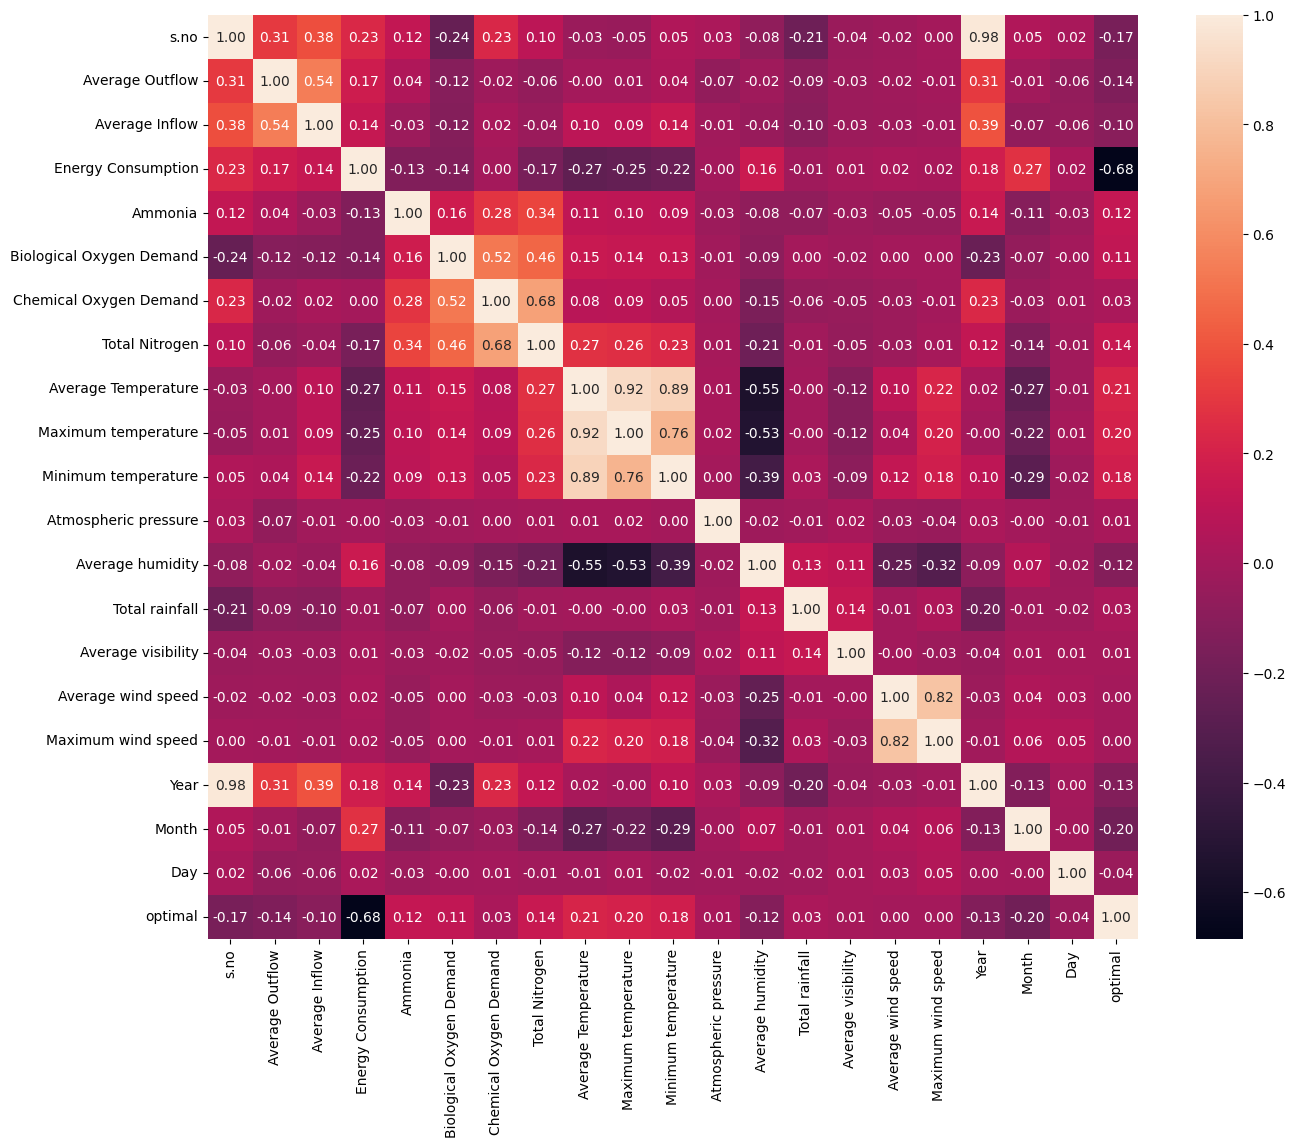

In [118]:
plt.figure(figsize=(15,12))
sns.heatmap(data=df[df.columns].corr(), annot = True, fmt = ".2f")

In [119]:
#Percentile Method 
lower_cap = df.quantile(0.05)
upper_cap = df.quantile(0.95)

#Capping
new_df = df.clip(lower=lower_cap, upper=upper_cap, axis=1)



NOW TRUNCATING THE DATA SO IT DOES NOT OVERFLOW

<Axes: >

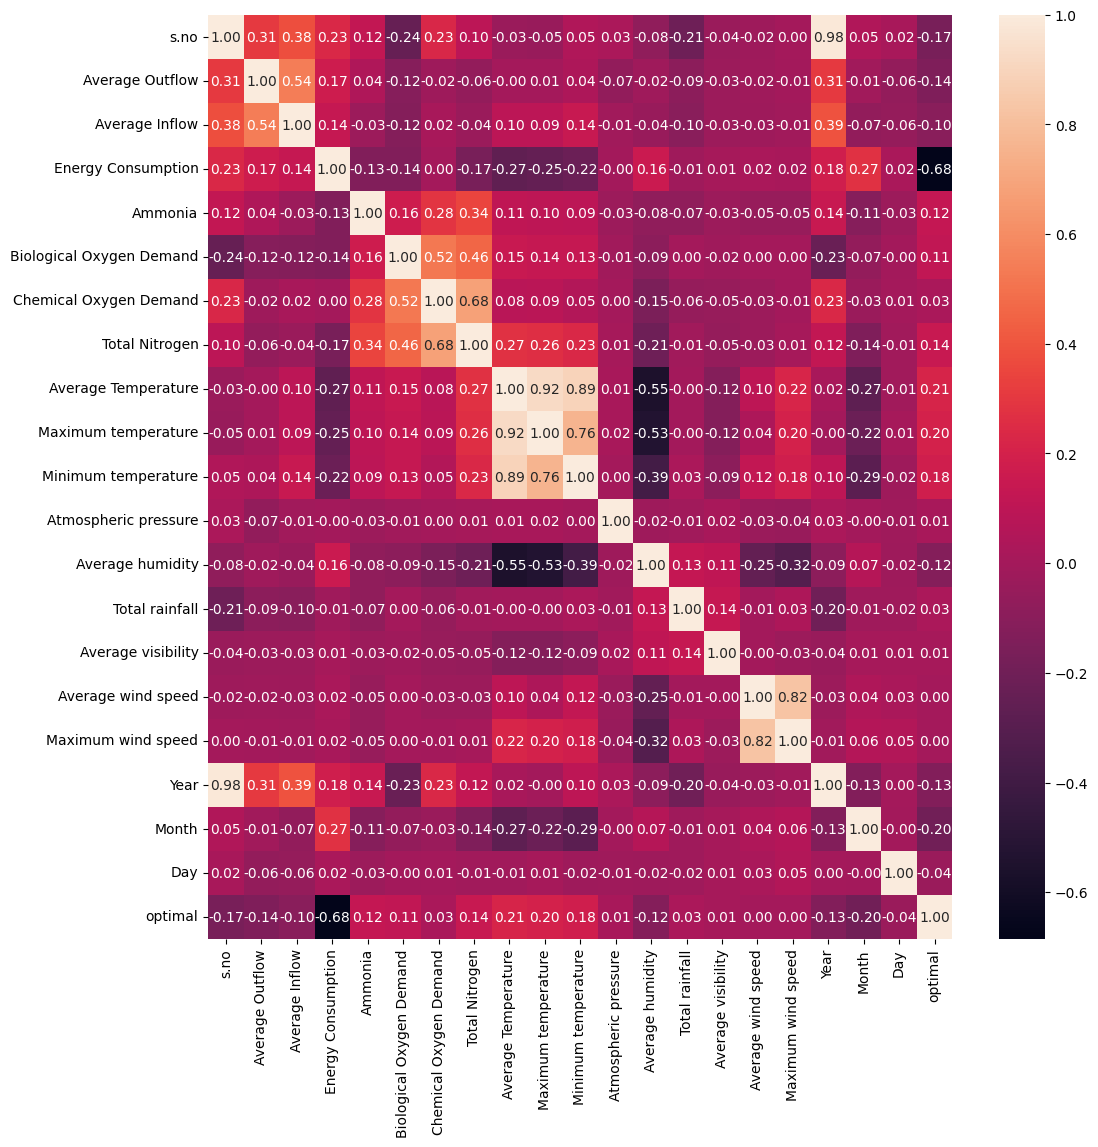

In [120]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df[df.columns].corr(), annot = True, fmt = ".2f")

NOW SPLITTING THE DATA IN TEST AND TRAIN 

In [121]:
X = new_df.drop(columns=['optimal','Year','Month','Day','s.no','Average wind speed','Maximum wind speed'])
Y = new_df['optimal']
X_train, X_test, y_train, y_test = train_test_split(
   X, Y, test_size = 0.2, random_state = 40
)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_train_with_one = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_with_one = np.c_[np.ones(X_test.shape[0]), X_test]
print('Shape of x_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of x_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)


Shape of x_train : (1105, 14)
Shape of y_train : (1105,)
Shape of x_test : (277, 14)
Shape of y_test : (277,)


SCALING THE DATA

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

LOGISTIC REGRESSION FROM SCRATCH 

In [123]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary Cross-Entropy Loss
def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# Logistic Regression Model
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Ensure y is a 1D array
        y = y.reshape(-1)

        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_model)

          
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

           
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_pred]
model = LogisticRegression(learning_rate=0.1, epochs=1000)
model.fit(x_train_scaled, y_train)
y_pred_logreg = model.predict(x_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_score_logreg = f1_score(y_test,y_pred_logreg)

print(accuracy_logreg)
print(f1_score_logreg)

0.9638989169675091
0.9743589743589743


LOG REG  USING SKLEARN

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg_sk = LogisticRegression()
y_train = y_train.reshape(-1)
X_train
logreg_sk.fit(x_train_scaled, y_train)


y_pred_logreg_sk = logreg_sk.predict(x_test_scaled)
accuracy_logreg_sk = accuracy_score(y_test, y_pred_logreg_sk)
f1_score_logreg_sk = f1_score(y_test,y_pred_logreg_sk)
print(accuracy_logreg_sk)
print(f1_score_logreg_sk)


0.9675090252707581
0.9769820971867008


KNN

In [161]:
from sklearn.neighbors import KNeighborsClassifier
k = 8
knn = KNeighborsClassifier(n_neighbors=k,weights='distance',metric="manhattan")
knn.fit(x_train_scaled, y_train)
y_pred_knn = knn.predict(x_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test,y_pred_knn)
print(accuracy_knn)
print(f1_score_knn)


0.8916967509025271
0.9246231155778895


DECISION TREE CLASSIFIER 

In [140]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_train_scaled, y_train)
y_pred_dtc = dtc.predict(x_test_scaled)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
f1_score_dtc = f1_score(y_test,y_pred_dtc)
print(accuracy_dtc)
print(f1_score_dtc)

0.9819494584837545
0.9868073878627969


RANDOM FOREST CLASSIFIER

In [141]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_scaled, y_train)
y_pred_rfc = rf.predict(x_test_scaled)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
f1_score_rfc = f1_score(y_test,y_pred_rfc)
print(accuracy_rfc)
print(f1_score_rfc)

0.9963898916967509
0.9973890339425587


SVM

In [142]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')  
svm.fit(x_train_scaled, y_train)
y_pred_svm = svm.predict(x_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test,y_pred_svm)
print(accuracy_svm)
print(f1_score_svm)

0.9386281588447654
0.9565217391304348


now doing model evaluation

In [143]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix

confusion_logreg = confusion_matrix(y_test, y_pred_logreg)
confusion_sk = confusion_matrix(y_test, y_pred_logreg_sk)
confusion_knn = confusion_matrix(y_test, y_pred_knn)
confusion_dtc = confusion_matrix(y_test, y_pred_dtc)
confusion_rfc = confusion_matrix(y_test, y_pred_rfc)
confusion_svm = confusion_matrix(y_test, y_pred_svm)


# Metrics Comparison
df_comp= {
    'Metrics' : ['Accuracy', 'f1-Score','Confusion Matrix'],
    'LR Scratch' : [accuracy_logreg , f1_score_logreg, confusion_logreg],
    'LR sklearn' : [accuracy_logreg_sk, f1_score_logreg_sk, confusion_sk],
    'KNN' : [accuracy_knn, f1_score_knn, confusion_knn],
    'Decision Tree' : [accuracy_dtc, f1_score_dtc, confusion_dtc],
    'Random Forest' : [accuracy_rfc, f1_score_rfc, confusion_rfc],
    'SVM' : [accuracy_svm, f1_score_svm, confusion_svm]
}
df_comp= pd.DataFrame(df_comp)
df_comp= df_comp.set_index('Metrics')
df_comp

,LR Scratch,LR sklearn,KNN,Decision Tree,Random Forest,SVM
Metrics,,,,,,
Accuracy,0.963899,0.967509,0.873646,0.981949,0.99639,0.938628
f1-Score,0.974359,0.976982,0.910486,0.986807,0.997389,0.956522
Confusion Matrix,"[[77, 9], [1, 190]]","[[77, 9], [0, 191]]","[[64, 22], [13, 178]]","[[85, 1], [4, 187]]","[[85, 1], [0, 191]]","[[73, 13], [4, 187]]"


In [145]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', None], 
    'C': uniform(0.01, 1),  
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]  
}
random_search = RandomizedSearchCV(
    estimator=logreg_sk,
    param_distributions=param_dist,
    n_iter=20,  
    scoring='accuracy',
    cv=5,  
    random_state=42,
    verbose=1
)
random_search.fit(x_train_scaled ,y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("\nBest Hyperparameters:")
print(best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Hyperparameters:
{'C': np.float64(0.19182496720710063), 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


c:\Users\sriva\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\sriva\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\sriva\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\sriva\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\sriva\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

In [146]:
from sklearn.model_selection import GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],            
    'weights': ['uniform', 'distance'],        
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}

grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_knn.fit(x_train_scaled, y_train)
best_params_knn = grid_search_knn.best_params_
print("Best Hyperparameters for KNN:", best_params_knn)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [154]:
#Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],        
    'max_depth': [None, 3, 5, 10],           
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],          
    'max_features': [None, 'sqrt', 'log2']   
}

grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_dt.fit(x_train_scaled, y_train)
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree:", best_params_dt)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [155]:
#Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],           
    'max_depth': [None, 10, 20, 30],         
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4],           
    'max_features': ['sqrt', 'log2', None],  
    'bootstrap': [True, False]               
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(x_train_scaled, y_train)
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [156]:
#SVC
param_grid_svc = {
    'C': [0.1, 1, 10, 100],                 
    'kernel': ['linear', 'rbf', 'poly'],     
    'gamma': ['scale', 'auto', 0.01, 0.1, 1], 
    'degree': [2, 3, 4],                     
    'class_weight': [None, 'balanced']      
}

grid_search_svc = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_svc.fit(x_train_scaled, y_train)
best_params_svc = grid_search_svc.best_params_
print("Best Hyperparameters for SVC:", best_params_svc)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Hyperparameters for SVC: {'C': 10, 'class_weight': None, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
